<a href="https://colab.research.google.com/github/arisnbrio/covid19_mobility_report/blob/main/Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting our Data

In [28]:
import pandas as pd
import plotly.io as pio
pio.renderers

mobility=pd.read_csv("https://storage.googleapis.com/covid19-open-data/v2/mobility.csv")
ind=pd.read_csv("https://storage.googleapis.com/covid19-open-data/v2/index.csv")
epid=pd.read_csv("https://storage.googleapis.com/covid19-open-data/v2/epidemiology.csv", parse_dates = True)

## Merging and Preprocessing Our Data

In [29]:
ind_epid=epid.merge(ind,on='key')
ind_mobility=mobility.merge(ind,on='key')
ind_mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537200 entries, 0 to 2537199
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date                            object 
 1   key                             object 
 2   mobility_retail_and_recreation  float64
 3   mobility_grocery_and_pharmacy   float64
 4   mobility_parks                  float64
 5   mobility_transit_stations       float64
 6   mobility_workplaces             float64
 7   mobility_residential            float64
 8   place_id                        object 
 9   wikidata                        object 
 10  datacommons                     object 
 11  country_code                    object 
 12  country_name                    object 
 13  subregion1_code                 object 
 14  subregion1_name                 object 
 15  subregion2_code                 object 
 16  subregion2_name                 object 
 17  locality_code              

In [30]:
ind_epidmod=ind_epid[(ind_epid['subregion1_name']=='California') & (ind_epid['aggregation_level']==1)].reset_index().\
drop(['index'],axis=1)
ind_epidmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               436 non-null    object 
 1   key                436 non-null    object 
 2   new_confirmed      436 non-null    float64
 3   new_deceased       436 non-null    float64
 4   new_recovered      0 non-null      float64
 5   new_tested         435 non-null    float64
 6   total_confirmed    436 non-null    float64
 7   total_deceased     436 non-null    float64
 8   total_recovered    0 non-null      float64
 9   total_tested       435 non-null    float64
 10  place_id           436 non-null    object 
 11  wikidata           436 non-null    object 
 12  datacommons        436 non-null    object 
 13  country_code       436 non-null    object 
 14  country_name       436 non-null    object 
 15  subregion1_code    436 non-null    object 
 16  subregion1_name    436 non

In [31]:
ind_mobilitymod=ind_mobility[(ind_mobility['subregion1_name']=='California') & (ind_mobility['aggregation_level']==1)].\
reset_index().drop(['index'],axis=1)
cols_to_use = ind_mobilitymod.columns.difference(ind_epidmod.columns)
df = pd.merge(ind_epidmod, ind_mobilitymod[cols_to_use], left_index=True, right_index=True, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            436 non-null    object 
 1   key                             436 non-null    object 
 2   new_confirmed                   436 non-null    float64
 3   new_deceased                    436 non-null    float64
 4   new_recovered                   0 non-null      float64
 5   new_tested                      435 non-null    float64
 6   total_confirmed                 436 non-null    float64
 7   total_deceased                  436 non-null    float64
 8   total_recovered                 0 non-null      float64
 9   total_tested                    435 non-null    float64
 10  place_id                        436 non-null    object 
 11  wikidata                        436 non-null    object 
 12  datacommons                     436 

## We remove the rows that don't have data for mobility since there seems to be missing values for mobility

In [32]:
data=df.dropna(subset=['mobility_grocery_and_pharmacy']).\
drop(['new_recovered','total_recovered','subregion2_code','subregion2_name','locality_code','locality_name',
      'wikidata','datacommons','place_id','country_code','country_name','subregion1_code','subregion1_name',
      '3166-1-alpha-2','3166-1-alpha-3','aggregation_level','total_confirmed','total_deceased','total_tested','key'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            408 non-null    object 
 1   new_confirmed                   408 non-null    float64
 2   new_deceased                    408 non-null    float64
 3   new_tested                      408 non-null    float64
 4   mobility_grocery_and_pharmacy   408 non-null    float64
 5   mobility_parks                  408 non-null    float64
 6   mobility_residential            408 non-null    float64
 7   mobility_retail_and_recreation  408 non-null    float64
 8   mobility_transit_stations       408 non-null    float64
 9   mobility_workplaces             408 non-null    float64
dtypes: float64(9), object(1)
memory usage: 35.1+ KB


,date,new_confirmed,new_deceased,new_tested,mobility_grocery_and_pharmacy,mobility_parks,mobility_residential,mobility_retail_and_recreation,mobility_transit_stations,mobility_workplaces
0,2020-01-22,0.0,0.0,0.0,1.0,19.0,0.0,1.0,1.0,-1.0
1,2020-01-23,0.0,0.0,0.0,0.0,31.0,-1.0,5.0,1.0,-1.0
2,2020-01-24,0.0,0.0,0.0,1.0,44.0,8.0,9.0,-12.0,-38.0
3,2020-01-25,0.0,0.0,0.0,0.0,16.0,0.0,0.0,3.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0


We now have a clean dataset we can work with


# Explore Our Data

## Number of Days

In [33]:
data['date'].nunique()


408

## Correlation Matrix to Check for Collinearity

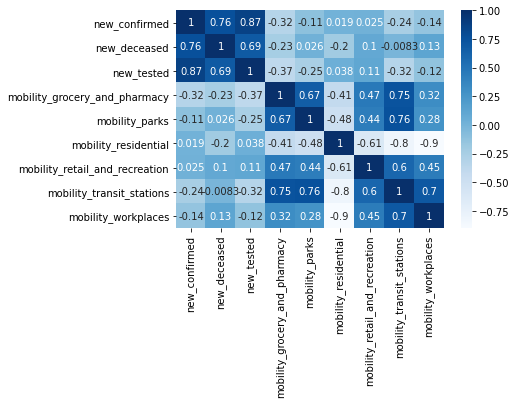

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = data.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot = True, cmap = 'Blues')
plt.show()

## How much has life change since COVID? When will we it return to normal?

Percentage increase/decrease from baseline activity amongst certain businesses and areas. 

Changes for each day are compared to a baseline value for that day of the week:

The baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020.
The datasets show trends over several months with the most recent data representing approximately 2-3 days ago—this is how long it takes to produce the datasets.

These insights based on data from users who have opted-in to Location History for their Google Account, so the data represents a sample of our users. As with all samples, this may or may not represent the exact behavior of a wider population.



## Visualizing Mobility in California

In [35]:
data_mobility=data[['date','mobility_grocery_and_pharmacy','mobility_parks','mobility_residential',
                    'mobility_retail_and_recreation','mobility_transit_stations','mobility_workplaces']]

In [39]:
# Using plotly.express
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=2)

fig.append_trace(go.Scatter(
    x=data_mobility['date'],
    y=data_mobility['mobility_grocery_and_pharmacy'],
    name="Grocery and Pharmacy"), row=1, col=1)

fig.append_trace(go.Scatter(
    x=data_mobility['date'],
    y=data_mobility['mobility_parks'],
name="Parks"), row=2, col=1)

fig.append_trace(go.Scatter(
    x=data_mobility['date'],
    y=data_mobility['mobility_residential'],
name="Residential"), row=3, col=1)

fig.append_trace(go.Scatter(
    x=data_mobility['date'],
    y=data_mobility['mobility_retail_and_recreation'],
name='Retail & Recreation'), row=1, col=2)

fig.append_trace(go.Scatter(
    x=data_mobility['date'],
    y=data_mobility['mobility_transit_stations'],
name='Transit Stations'), row=2, col=2)

fig.append_trace(go.Scatter(
    x=data_mobility['date'],
    y=data_mobility['mobility_workplaces'],
name='Workplaces'), row=3, col=2)

fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(height=900, width=1800, title_text="Mobility")
fig.show()

## Visualizing New Confirmed/Deaths/Tested

In [40]:
data_new=data[['date','new_confirmed','new_deceased','new_tested']]

In [41]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=data_new['date'],
    y=data_new['new_confirmed'],
    name="New Confirmed Cases"), row=1, col=1)

fig.append_trace(go.Scatter(
    x=data_new['date'],
    y=data_new['new_deceased'],
name="New Deaths"), row=2, col=1)

fig.append_trace(go.Scatter(
    x=data_new['date'],
    y=data_new['new_tested'],
name="New Tested"), row=3, col=1)
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(height=900,width=1800, title_text="New Confirmed/Death/Tested")
fig.show()

## Split into Test and Train Sets
Taking all dates besides the month of February as our training data, and dates past February as our Test data.

In [12]:
train_df=data[(data['date'] <= '2021-02-01')].set_index('date')
X_train=train_df.drop(['mobility_transit_stations'],axis=1)
Y_train=train_df['mobility_transit_stations']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 2020-01-22 to 2021-02-01
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   new_confirmed                   377 non-null    float64
 1   new_deceased                    377 non-null    float64
 2   new_tested                      377 non-null    float64
 3   mobility_grocery_and_pharmacy   377 non-null    float64
 4   mobility_parks                  377 non-null    float64
 5   mobility_residential            377 non-null    float64
 6   mobility_retail_and_recreation  377 non-null    float64
 7   mobility_workplaces             377 non-null    float64
dtypes: float64(8)
memory usage: 26.5+ KB


In [13]:
test_df=data[(data['date'] >= '2021-02-01')].set_index('date')
X_test=test_df.drop(['mobility_transit_stations'],axis=1)
Y_test=test_df['mobility_transit_stations']

## Multiple Linear Regression

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('Coefficients______________:')
print('new_confirmed:', regr.coef_[0])
print('new_deceased:', regr.coef_[1])
print('new_tested:', regr.coef_[2])
print('mobility_grocery_and_pharmacy:', regr.coef_[3])
print('mobility_parks', regr.coef_[4])
print('mobility_residential:', regr.coef_[5])
print('mobility_retail_and_recreation:', regr.coef_[6])
print('mobility_workplaces:', regr.coef_[7])

Coefficients______________:
new_confirmed: 3.692705651361406e-05
new_deceased: -0.0027233600801621037
new_tested: -2.7858516453619416e-05
mobility_grocery_and_pharmacy: 0.050015123086535905
mobility_parks 0.137666868973597
mobility_residential: 0.24167934967282423
mobility_retail_and_recreation: 0.47485093907693754
mobility_workplaces: 0.4130253463667927


In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred=regr.predict(X_test)
print('MSE:', mean_squared_error(Y_test,y_pred))
print('Multiple Linear Regression: R^2 score on training set', regr.score(X_train, Y_train))
print('Multiple Linear Regression: R^2 score on test set', regr.score(X_test, Y_test))


MSE: 3.6484238475693527
Multiple Linear Regression: R^2 score on training set 0.9367049461534583
Multiple Linear Regression: R^2 score on test set 0.8685252667542577


## LASSO Regression

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X_train.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, Y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, Y_train)
    test_r_squared[ind] = reg.score(X_test, Y_test)

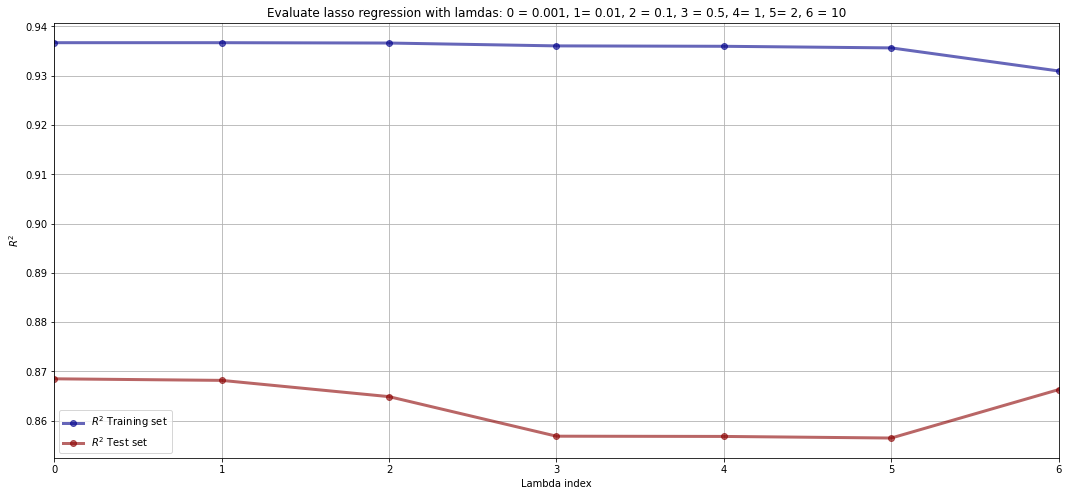

In [18]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lambda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [19]:
df_lam = pd.DataFrame(test_r_squared, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    0.86849
lambda       0.00100
Name: 0, dtype: float64

In [20]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.001)
reg_best.fit(X_train, Y_train)
y_pred_lassmax =reg_best.predict(X_test)
print('LASSO MSE:', mean_squared_error(Y_test,y_pred_lassmax))
print('Lasso Regression: R^2 score on training set', reg_best.score(X_train, Y_train))
print('Lasso Regression: R^2 score on test set', reg_best.score(X_test, Y_test))

LASSO MSE: 3.649399824697876
Lasso Regression: R^2 score on training set 0.9367049390141842
Lasso Regression: R^2 score on test set 0.8684900964072837


## LASSO Regression with Cross Validation

In [21]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X_train.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [22]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, Y_train)
    results = cross_val_score(reg, X_train, Y_train, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, Y_train)    
    test_r_squared[ind] = reg.score(X_test, Y_test)

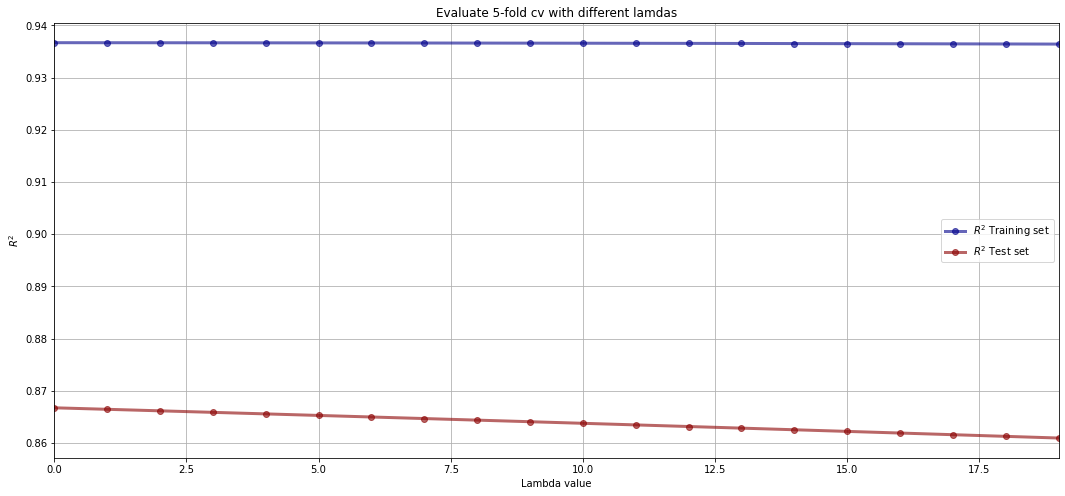

In [23]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lambda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [24]:
df_lam = pd.DataFrame(test_r_squared, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    0.866733
lambda       0.050000
Name: 0, dtype: float64

In [25]:
reg_bestcv = Lasso(alpha = 0.05)
reg_bestcv.fit(X_train, Y_train)
y_pred_lasscv =reg_bestcv.predict(X_test)
print('Lasso Regression with CV MSE:', mean_squared_error(Y_test,y_pred_lasscv))
print('Lasso Regression with CV: R^2 score on training set', reg_bestcv.score(X_train, Y_train))
print('Lasso Regression with CV: R^2 score on test set', reg_bestcv.score(X_test, Y_test))

Lasso Regression with CV MSE: 3.6981648725263567
Lasso Regression with CV: R^2 score on training set 0.936687098260975
Lasso Regression with CV: R^2 score on test set 0.8667327973864376


In [26]:
print('Multiple Linear Regression: R^2 score on test set', regr.score(X_test, Y_test))
print('Lasso Regression: R^2 score on test set', reg_best.score(X_test, Y_test))
print('Lasso Regression with CV: R^2 score on test set', reg_bestcv.score(X_test, Y_test))



Multiple Linear Regression: R^2 score on test set 0.8685252667542577
Lasso Regression: R^2 score on test set 0.8684900964072837
Lasso Regression with CV: R^2 score on test set 0.8667327973864376


In [27]:
print('Multiple Linear Regression MSE:', mean_squared_error(Y_test,y_pred))
print('LASSO MSE:', mean_squared_error(Y_test,y_pred_lassmax))
print('Lasso Regression with CV MSE:', mean_squared_error(Y_test,y_pred_lasscv))


Multiple Linear Regression MSE: 3.6484238475693527
LASSO MSE: 3.649399824697876
Lasso Regression with CV MSE: 3.6981648725263567
